Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [2]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

from stats_utils import plot_dists

### Beta

Otra familia de distribuciones de probabilidad **continuas**, que sólo pueden tomar **valores entre 0 y 1**. Esta familia es útil para modelizar nuestra incertidumbre sobre una **probabilidad**.

Por ejemplo, observando las estadísticas de averías de varios componentes: ¿cuál es la probabilidad **p_i** de fallo del componente $i$ en una jornada de operación normal? Si tenemos muchos datos podremos hacer un promedio, pero con pocos datos, no es tan sencillo.

- En un mes usando el componente $C_1$, ha funcionado bien 20 veces y ha fallado 10: ¿podemos decir con seguridad que la probabilidad de fallo $p_1$ es 1/3? ¿podemos decir al menos que es casi imposible que $p_1$ sea mayor que 0.5?
- Tras tres días usando el componente $C_2$, ha funcionado bien 2 veces y ha fallado 1: ¿podemos decir con seguridad que la probabilidad de fallo $p_2$ es 1/3? ¿podemos decir al menos que es casi imposible que $p_2$ sea mayor que 0.5?

La [familia de distribuciones Beta](https://en.wikipedia.org/wiki/Beta_distribution) permite:
 - representar nuestra incertidumbre sobre el auténtico valor de $p_i$ en cualquier momento.
 - actualizar nuestro conocimiento sobre el auténtico valor de $p_i$ según vamos recopilando más datos, con unas cuentas increíblemente sencillas.

Es una familia ``Beta(a,b)`` que depende de dos parámetros __a__ y **b** , que podemos *interpretar* como:
 - __a__: *evidencia a favor de que es posible observar el resultado (e.g. observaciones en las que el componente falla)*
 - __b__: *evidencia a favor de que es posible **no** observar el resultado (e.g. observaciones en las que el componente funciona)*
 
Es decir:
 - cuanto mayor a, más probable que el componente falle.
 - cuanto mayor b, más probable que no falle.
 - cuanto mayor es a+b, más convencidos estamos de conocer el auténtico valor de la probabilidad de fallo, porque tenemos más evidencia.

 - La función de densidad:
$$
f(p) = \frac{p^{a-1}(1-p)^{b-1}} {\beta(a,b)}
$$
donde $Beta(a,b)$ es la **función Beta**, una función de dos variables reales que probablemente no os habéis encontrado antes. Su valor no es importante, es *la constante que hay que poner para que la integral de la función de densidad sea 1*:
$$
\beta(a,b) = \int_{p\in[0,1]} p^{a-1}(1-p)^{b-1}
$$
 - La media de $X\sim Beta(a, b)$:
$$
E[X] = \frac{a }{a+b}
$$
 - La varianza de $X\sim Beta(a,b)$:
$$
Var[X] = \frac{a\;b }{(a+b)^2\;(a+b+1)}
$$

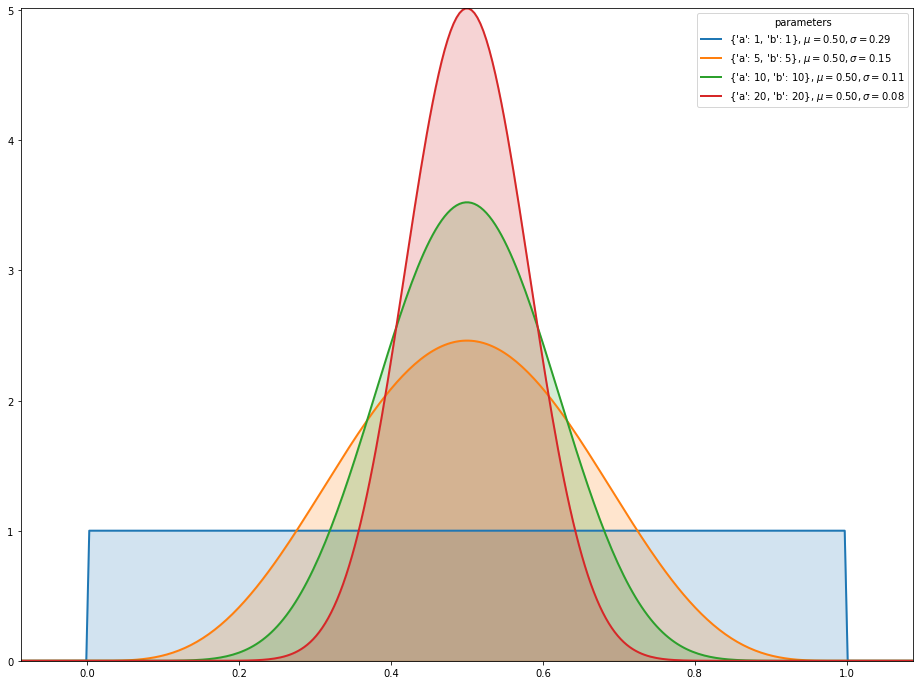

In [3]:
#Estudiamos un juego de azar, con una cierta probabilidad de ganar que desconocemos
#A igual evidencia a favor de cada posibilidad, 
#poca evidencia indica que aún no sabemos si el juego es justo
#más evidencia aumenta nuestra confianza en que el juego es equilibrado (p esta cerca de 0.5)
betas = [st.beta(a=1, b=1),
         st.beta(a=5, b=5),
         st.beta(a=10, b=10),
         st.beta(a=20, b=20)
         ]

plot_dists(betas)

Vamos a mantener tres ratios: 0.25, 0.5 y 0.75, pero aumentando la cantidad de evidencia

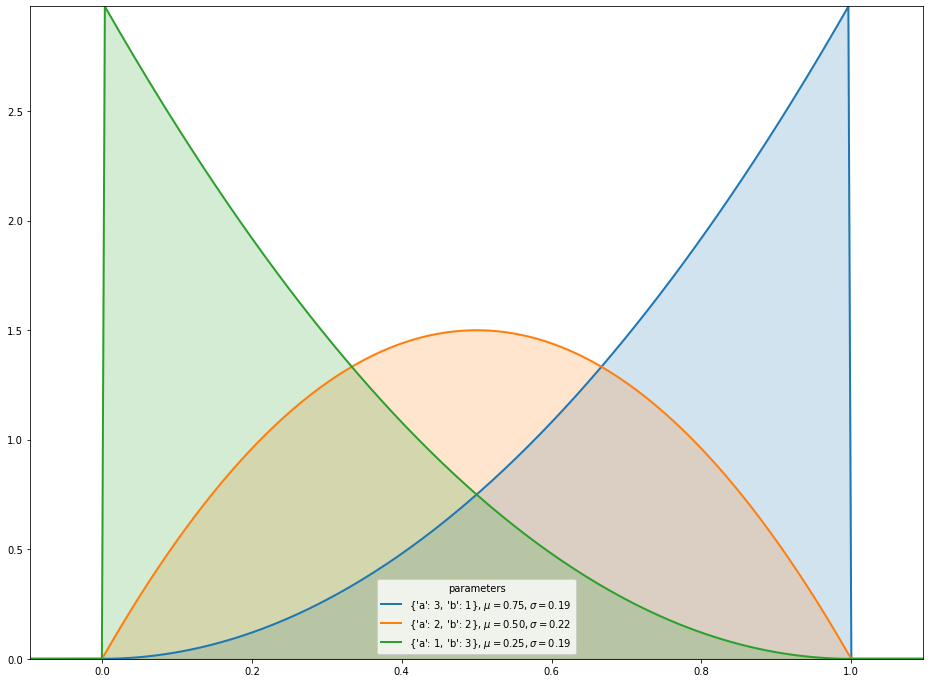

In [4]:
betas = [st.beta(a=3, b=1),
         st.beta(a=2, b=2),
         st.beta(a=1, b=3)
         ]

plot_dists(betas)

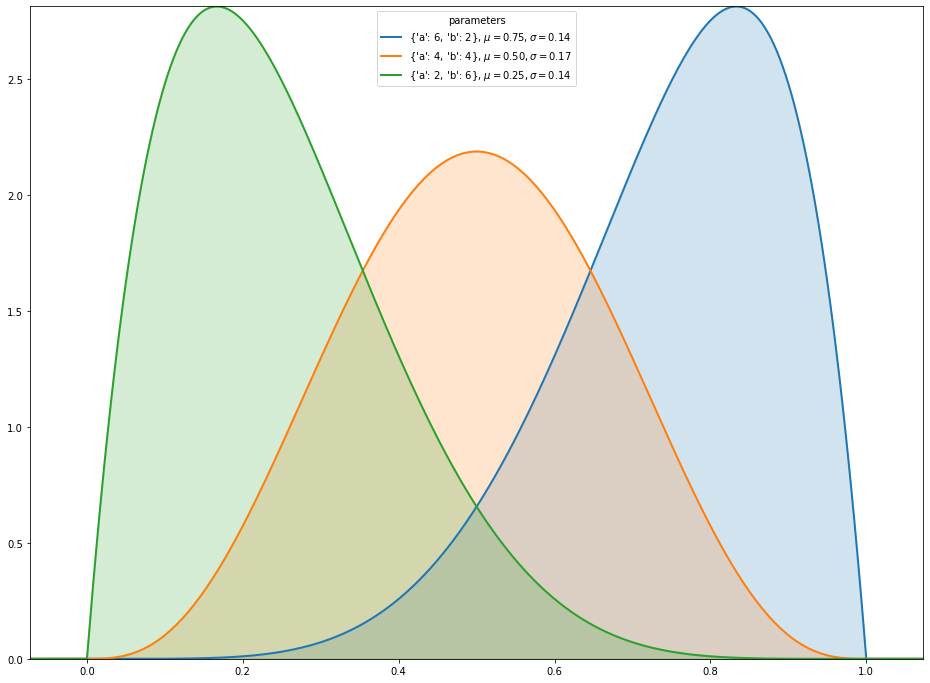

In [5]:
betas = [st.beta(a=6, b=2),
         st.beta(a=4, b=4),
         st.beta(a=2, b=6)
         ]

plot_dists(betas)

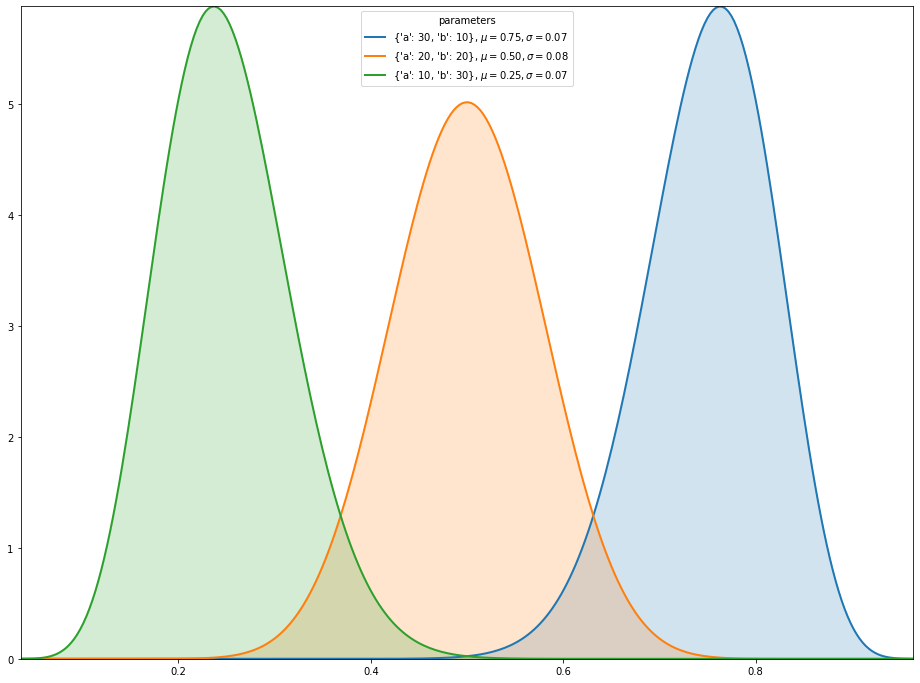

In [6]:
betas = [st.beta(a=30, b=10),
         st.beta(a=20, b=20),
         st.beta(a=10, b=30)
         ]

plot_dists(betas)

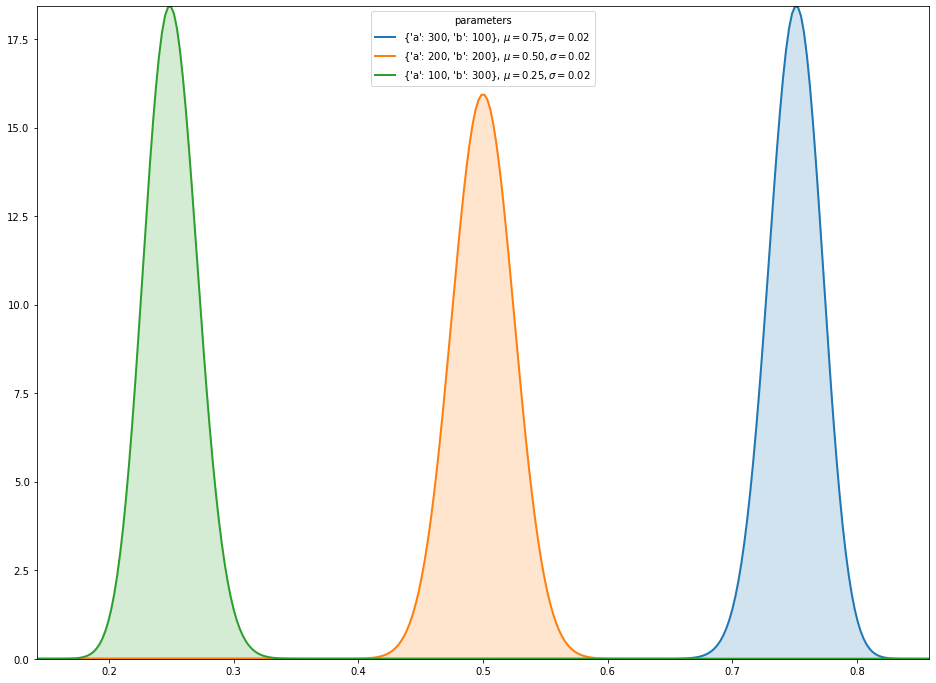

In [7]:
betas = [st.beta(a=300, b=100),
         st.beta(a=200, b=200),
         st.beta(a=100, b=300)
         ]

plot_dists(betas)

## Inferencia bayesiana con una beta

Os mostramos un ejemplo de uso del teorema de Bayes:

 - A priori, desconocemos la probabilidad __p__ de encontrar delfines en cierta región. Para empezar, podemos considerar que todos los valores de **p** entre 0 y 1 son igualmente probables. Esto es equivalente a una distribución ``Beta(a=1,b=1)``.
- Si tenemos información a priori, como por ejemplo que es más probable que __p__ sea menor que 1/2, podemos incorporarla tomando otros valores de los **hiperparámetros a** y **b**.
- Según salimos a navegar y encontramos delfines, o no, nuestra distribución de probabilidad sobre **p** se concentra en torno al valor real.

Supongamos que en cierto momento, nuestra incertidumbre sobre p corresponde a una Beta(a,b). Salimos a navegar por esa región. Sea

> X = 1 si encontramos delfines, 0 si no los encontramos

Toma los valores 0 ó 1 => es una Bernoulli.

Pero, **¿cuál es el parámetro p de esta Bernoulli?**. En otras palabras: *"¿cuál es la probabilidad $P(X=1\:|\: p)$ de encontrar delfines, condicionado a que la probabilidad de encontrar delfines es **p**?"*. La respuesta es **p**, claramente.


Fácil, ¿no? Ahora hacemos la pregunta **inversa**: salimos a navegar y encontramos delfines, ¿cómo cambia ahora nuestro conocimiento sobre p?

Usamos la fórmula de la densidad condicionada
$$
f(p|x)=\frac{P(x|p)f(p)}{P(x)}=Cpp^{a-1}(1-p)^{b-1}=Cp^{a}(1-p)^{b-1}
$$
en donde la constante $C=\frac{1}{\beta(a+1,b)}$ es la única que integra $1$.

$$
P(p\in A | X=1) = \frac{ P(X=1\cap p\in A)}{P(X=1)}
$$

Desarrollamos usando el teorema de la probabilidad total, en su versión continua:

$$
\begin{split}
P(p\in A | X=1) 
 &= \frac{ \int_{p\in A}P(X=1\:|\: p)f(p)}{\int_{p\in \mathbb{R}}P(X=1\:|\: p)f(p)}
 = \frac{ \int_{p\in A}p\:\frac{p^{a-1}(1-p)^{b-1}} {\beta(a,b)}}{\int_{p\in \mathbb{R}} p \: \frac{p^{a-1}(1-p)^{b-1}} {\beta(a,b)}}\\
 &= \frac{ \int_{p\in A} p^{a}(1-p)^{b-1} }
         { \int_{p\in \mathbb{R}} p^{a}(1-p)^{b-1} }
 = \frac{ \int_{p\in A} p^{a}(1-p)^{b-1} }
         { \beta(a+1,b) }
\end{split}
$$

Interpretamos esta cuenta de esta forma:

> Después de incorporar la información $X=1$, el parámetro $p$ sigue una distribución continua de tipo ``Beta(a+1,b)``.

Partimos de una ``Beta(1,1)``, y cada vez que salimos a navegar la actualizamos según una regla sencilla:

 - Si salimos **1** vez y encontramos delfines, nuestro conocimiento sobre p0 evoluciona, desde una ``Beta(a,b)``, a una ``Beta(a+1,b)``.
 - Si salimos **1** vez y __no__ encontramos delfines, nuestro conocimiento sobre p0 evoluciona, desde una ``Beta(a,b)``, a una ``Beta(a,b+1)``.


También es fácil incorporar información de tipo ``Binomial`` y ``Geometrica``:
 
 - Si de un total de __n__ salidas, encontramos delfines un total de ***e***  y no los encontramos ***f=n-e***, nuestro conocimiento sobre p0 evoluciona, desde una ``Beta(a,b)``, a una ``Beta(a+e,b+f)``.
 - Si tenemos que salir **n** veces hasta encontrar delfines por primera vez, nuestro conocimiento sobre p0 evoluciona, desde una ``Beta(a,b)``, a una ``Beta(a+1,b+n-1)``.


### Ejemplo

Necesitamos un par de botas para cada miembro de la tripulación.
Encontramos varios fabricantes de botas en internet que aparentemente cumplen con nuestros requisitos, pero puede que sean incómodas.

 - Uno tiene 1 comentario positivo y ninguno negativo.
 - Otro tiene 3 comentarios positivos y 1 negativo.
 - Un tercero tiene 26 comentarios positivos y 14 negativos.
 
¿Cuál es la probabilidad, para cada uno, de que satisfaga a más de la mitad de la tripulación?

Si comparamos los ratios de éxito, puede parecer que el tercer fabricante es el peor, porque tenemos un $26/40=65\%$ de comentarios positivos, para el segundo, el ratio es $3/4=75\%$, y para el primero es del $100\%$, pero nuestra *confianza* en cada una de estas afirmaciones es distinta, porque tenemos *distinta cantidad de evidencia*.

La respuesta depende (en cierta medida) de cuál sea el punto de partida ``Beta(a,b)``:
 
 - Si elegimos ``Beta(1,1)`` como prior, quiere decir que consideramos que para un cierto fabricante del que no sabemos nada, la probabilidad de que el producto cumpla nuestros requisitos puede ser cualquier número entre 0 y 1.
 - Si elegimos ``Beta(5,5)`` como prior, por ejemplo, quiere decir que consideramos que para la mayoría de fabricantes, es bastante probable que la probabilidad de que el producto cumpla nuestros requisitos esté cerca de $0.5$.

Esta distribución se llama *distribución de probabilidad a priori* (*prior distribution*), o **"prior"**, a secas.

Ante la duda, lo más habitual es usar un prior *poco informativo*, con poca evidencia a favor o en contra. Cuando tenemos suficientes datos, la elección del prior no es importante.

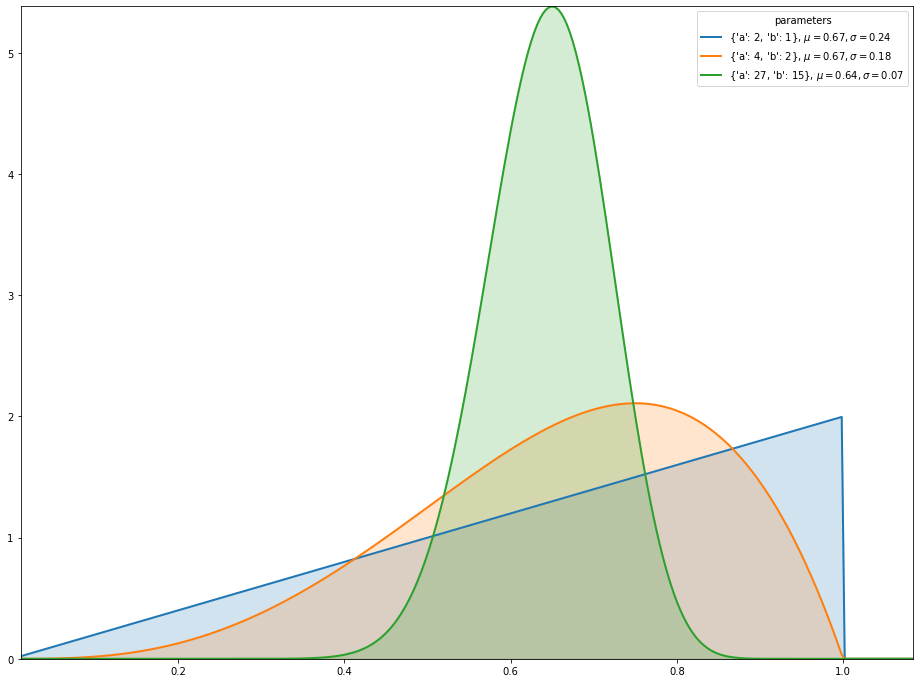

In [7]:
a0, b0 = 1, 1
betas = [st.beta(a=a0+1, b=b0),
         st.beta(a=a0+3, b=b0+1),
         st.beta(a=a0+26, b=b0+14)
         ]

plot_dists(betas)

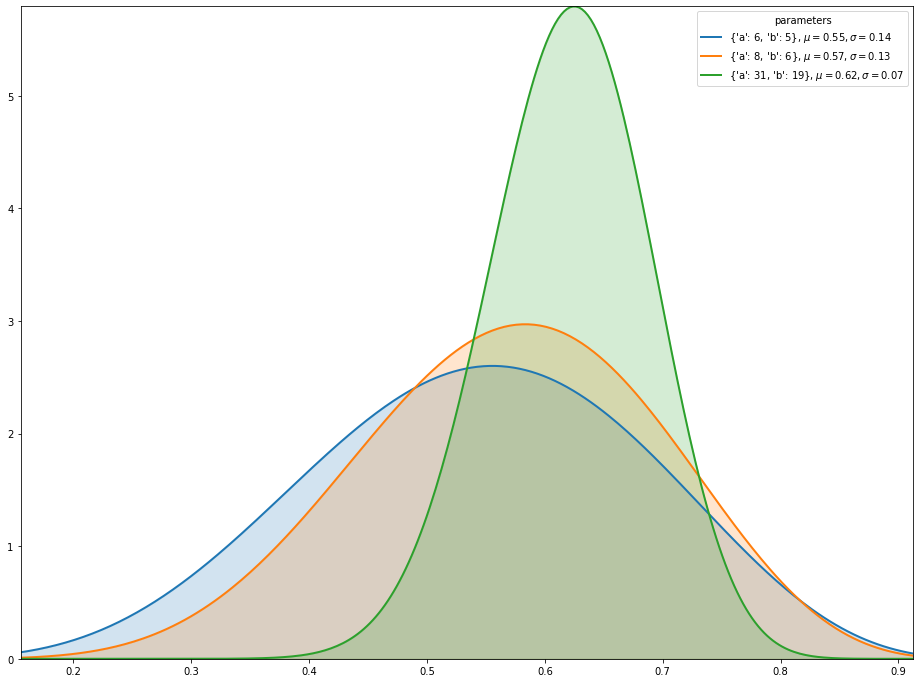

In [8]:
#El conocimiento a priori de que, para este producto, la probabilidad de
#satisfacción suele estar en torno al 50% cambia nuestras conclusiones
a0, b0 = 5,5
betas = [st.beta(a=a0+1, b=b0),
         st.beta(a=a0+3, b=b0+1),
         st.beta(a=a0+26, b=b0+14)
         ]

plot_dists(betas)

Probabilidad de que cada fabricante satisfaga a más de la mitad de la tripulación, usando el prior poco informativo.

In [9]:
a0,b0 = 1,1
for a,b in [(a0 + 1, b0), 
            (a0 + 3, b0 + 1), 
            (a0+26, b0+14)
           ]:
    print(1 - st.beta(a=a,b=b).cdf(0.5))

0.75
0.8125
0.9702080559909518


Probabilidad de que cada fabricante satisfaga a más de la mitad de la tripulación, usando el prior ``Beta(5,5)``.

In [10]:
a0,b0 = 5,5
for a,b in [(a0 + 1, b0), 
            (a0 + 3, b0 + 1),
            (a0+26, b0+14)
           ]:
    print(1 - st.beta(a=a,b=b).cdf(0.5))

0.6230468749999999
0.70947265625
0.9572834334213027


## Resumen

La situación es idéntica a la que encontramos al hacer la estimación de la tasa de un proceso de Poisson:

 - Sabemos que un suceso aleatorio sigue una distribución en cierta familia (Bernoulli, Binomial, Geométrica), pero **no conocemos el parámetro $p$**.
 - Representamos nuestra incertidumbre sobre el valor del parámetro mediante una distribución de probabilidad ``Beta(a,b)``, para ciertos valores de los **hiperparámetros a y b**, que tenemos que elegir sin usar los datos, para __representar nuestra incertidbumbre a priori__.
 - Cada vez que recibimos datos, **actualizamos nuestra incertidumbre sobre el valor de $p$**, que representamos mediante una ``Beta(a',b')``, con otros valores distintos de los **hiperparámetros a' y b'**.

## Verosimilitud y probabilidad a priori

En general, este procedimiento se llama **"Inferencia bayesiana paramétrica"**:
 - Sabemos que un experimento aleatorio sigue una distribución en cierta familia, pero no conocemos el parámetro. Definimos la función de **verosimilitud**: es la _misma_ definición que ya vimos para el _método de máxima verosimilitud_.
 - Representamos nuestra incertidumbre sobre el valor del parámetro mediante una distribución de probabilidad, que llamamos **distribución de probabilidad a priori**.
 - Cuando recibimos datos y actualizamos nuestra incertidumbre sobre el valor del parámetro, obtenemos la **distribución de probabilidad a posteriori**.

## Verosimilitud y probabilidad a priori en familias conjugadas

Como vimos en un cuaderno anterior:

> - Cuando la verosimilitud y la distribución a priori pertenecen a familias conjugadas, las cuentas son muy sencillas

En la wikipedia puedes encontrar una [lista de distribuciones conjugadas](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions)

## Críticas a la estadística bayesiana

Los motivos principales por los que el enfoque bayesiano se ha utilizado menos en la segunda mitad del siglo XX son:
 1. El deseo de tener método estadísticos *objetivos*, que todos los investigadores apliquen de la misma forma.
 1. La dificultad práctica de elegir una distribución a priori que represente nuestro conocimiento parcial sobre el valor del parámetro.
 1. En ausencia de familias conjugadas, requiere de cálculos pesados que hace décadas no se sabían hacer ni se podían aproximar.

### Defensa del método bayesiano

 - En abundancia de datos, la elección de la información a priori deja de tener importancia: *personas con ideas previas diferentes (pero razonables) convergerán a ideas similares ante una cantidad suficiente de evidencia*.
 - Cuando los datos no son abundantes, el enfoque bayesiano permite estimar hasta qué punto la información a priori determina el resultado, o preguntarse qué tipo de nueva medición nos aportará información más útil.
 - Permite incorporar conocimiento previo, que es crucial para misiones caras e innovadoras (no tenemos estadísticas sobre misiones a Marte, y en Ingeniería Naval es habitual romper el molde).
 - La estadística bayesiana conecta de forma perfecta con la *Teoría de decisión racional*, que a partir de unos axiomas muy razonables determina la forma en la que un agente racional debe tomar decisiones en la presencia de incertidumbre.
 - Pero sobre todo: el teorema de Bayes se deriva de los axiomas de la probabilidad. Negar el teorema de Bayes implica negar los axiomas de la probabilidad. No hay ningún sistema de axiomas sensato para la probabilidad en el que el teorema de Bayes no sea cierto. La probabilidad es el mejor método conocido para cuantificar la incertidumbre.

### Complejidad de la Estadística Bayesiana

Es habitual escuchar que la estadística bayesiana es más complicada que la estadística frecuentista (la escuela dominante en ciencias sociales y médicas).

Es cierto que el enfoque frecuentista es más fácil de aplicar _en casos sencillos_, pero:
 - es menos flexible, definitivamente no es más fácil en problemas de complejidad media y alta.
 - no conecta bien con la teoría de la decisión, de modo que si queremos usar las conclusiones del análisis para toma de decisiones, la cosa se complica.
 - aunque sea fácil de aplicar, es más complicado de entender, como evidencia [este artículo en Nature](https://www.nature.com/articles/d41586-019-00857-9) donde mencionan que al estudiar cerca de 800 artículos publicados en revistas científicas, observaron que la *mitad* no estaban aplicando correctamente cierto concepto básico de la teoría frecuentista.
 - durante las últimas décadas se han desarrollado multitud de métodos para calcular distribuciones de probabilidad a posteriori de forma *aproximada*.

### Estadística Bayesiana Objetiva

La primera crítica a la estadística bayesiana (la dependencia de los resultados del análisis respecto a la elección del prior), derivó en la creación de la **Estadística Bayesiana Objetiva**.

Hay unas cuantas técnicas para elegir una distribución a priori de forma objetiva, y veremos dos:

 - prior uniforme
 - prior de Jeffreys

#### Distribuciones a priori uniformes

El prior uniforme para un parámetro real asigna igual probabilidad a todos los valores admisibles del parámetro.
Se basa en el _principio de indiferencia_, enunciado por Laplace.

 - **Atención**: Cuando el conjunto de valores es infinito, el prior uniforme no es una auténtica distribución de probabilidad, sino que es una __distribución impropia__.
 Esto significa que no podemos preguntar cuál es la probabilidad a priori de que el parámetro esté en un intervalo, ni está bien definido el valor medio del parámetro.
 Sin embargo, la distribución a posteriori sí está bien definida (siempre que tengamos al menos un dato).

Distribuciones a priori uniformes para:

 - __Una probabilidad $p$:__ la distribución uniforme en el intervalo $[0,1]$, que coincide con la distribución $Beta(1,1)$.
 - __La tasa $\lambda$ de un proceso de Poisson:__ la distribución uniforme en $\mathbb{R}^+$, que es _impropia_, y es también la distribución Gamma(alpha=1, beta=0).
 - __La media $\mu$ de una distribución Normal cuya precisión $\tau=\frac{1}{\sigma^2}$ es conocida:__ la distribución uniforme en $\mathbb{R}$, que es _impropia_, y es también la distribución $Normal(\mu=0,\tau=0)$.
 - __La precisión $\tau$ de una distribución Normal cuya media $\mu$ es conocida:__ la distribución uniforme en $\mathbb{R}^+$, que es _impropia_, y es también la distribución $Gamma(1,0)$.


El principal _inconveniente_ del principio de indiferencia es que el prior uniforme asociado a $\sigma$ es diferente del el prior uniforme asociado a $\sigma^2$, y del prior uniforme asociado a $\tau=\frac{1}{\sigma^2}$.

#### Distribuciones a priori de Jeffreys

La distribución de Jeffreys tiene una definición más complicada, pero tiene la interesante propiedad de ser _independiente de la parametrización_.
El prior de Jeffreys asociado a $\sigma$ es el mismo que el asociado a $\sigma^2$, y a $\tau=\frac{1}{\sigma^2}$.

Además, cuando sólo tenemos un hiperparámetro, el prior de Jeffreys maximiza el valor esperado de la ganancia de información tras incorporar los datos.

Al igual que para los priores uniformes, el prior de Jeffreys es a menudo _impropio_.

Distribuciones a priori de Jeffreys para:

 - __Una probabilidad $p$:__ la distribución $Beta(1/2,1/2)$, que es propia, aunque la función de densidad sea discontinua en $p=0$ y en $p=1$.
 - __La tasa $\lambda$ de un proceso de Poisson:__ la distribución Gamma(alpha=1/2, beta=0).
 - __La media $\mu$ de una distribución Normal cuya precisión $\tau=\frac{1}{\sigma^2}$ es conocida:__ la distribución uniforme en $\mathbb{R}$, que es _impropia_, y es también la distribución $Normal(\mu=0,\tau=0)$.
 - __La precisión $\tau$ de una distribución Normal cuya media $\mu$ es conocida:__ la $Gamma(0,0)$.

### Conclusiones ?

En fin, el tema es controvertido, y ya os habréis dado cuenta de que en este debate he tomado partido por la estadística bayesiana. Este vídeo, por ejemplo, es muy ameno y resume bastante bien mi opinión sobre la estadística bayesiana:

https://www.youtube.com/watch?v=R6d-AbkhBQ8

De todas formas, además del método de máxima verosimilitud, que sí es fácil de usar y de entender, veremos dentro de poco la teoría de regresión, en su versión frecuentista, y hablaremos un poco sobre algunos "contrastes de hipótesis" e "intervalos de confianza", que son el meollo del método frecuentista.

### Glosario en inglés

 - **verosimilitud**: *likelihood*
 - **distribución de probabilidad a priori**: *prior distribution*
 - **distribución de probabilidad a posteriori**: *posterior distribution*
 - **distribución de probabilidad a priori conjugada**: *prior conjugate distribution*
 - **hiperparámetros**: *hyperparameters*

### Pseudo-Ejercicio (no lo entregues)

Busca en la [lista de la wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions), o en la **cheatsheet**, los ejemplos que hemos usado hasta ahora. Si no entiendes la tabla pregunta al profesor:

 - Medimos el _"tiempo hasta el siguiente suceso"_ en un proceso de Poisson cuya tasa desconocemos: la *verosimilitud* es una **Exponencial** y la *distribución conjugada* es una **Gamma**.
 - Medimos el _"número de ocurrencias en un intervalo de tiempo fijo"_ en un proceso de Poisson cuya tasa desconocemos:  la *verosimilitud* es una **Poisson** y la *distribución conjugada* es una **Gamma**.
 - Medimos la _"probabilidad de un suceso binario"_, pero desconocemos la probabilidad del suceso:  la *verosimilitud* es una **Bernoulli** y la *distribución conjugada* es una **Beta**.
 - Medimos el _"número de éxitos en **n** repeticiones independientes de un suceso binario"_, pero desconocemos la probabilidad del suceso:  la *verosimilitud* es una **Binomial** y la *distribución conjugada* es una **Beta**.
 - Medimos el _"número de repeticiones hasta el primer éxito en repeticiones independientes de un suceso binario"_, pero desconocemos la probabilidad del suceso:  la *verosimilitud* es una **Geometrica** y la *distribución conjugada* es una **Beta**.

### Ejercicios

- Plantea y resuelve los ejercicios de la hoja de ejercicios, dibujando las funciones de densidad a priori y a posteriori para los hiperparámetros.